<a href="https://colab.research.google.com/github/Temchik-X/DataMiningML/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Лабораторная работа 3

Дан набор данных по сердечным заболеваниям. В наборесодержатся различные атрибуты пациента, позволяющие определить наличие или отсутствие сердечных
заболеваний. Он включает такие характеристики, как возраст, пол, тип боли в
груди, кровяное давление в состоянии покоя и уровень холестерина, всего 303
экземпляра в наборе данных. Построить классификационную модель для целевого признака «target» - признак наличия(1) или отсутствия(0) сердечных заболеваний у пациента.

В методичесикх указаниях отсутствует указание по модели обучения и преобразованию данных. Были выбраны:<br>
a. Пункт 5 – простая рекуррентная сеть<br>
b. Пункт 3.h – Min-max масштабирование


In [10]:
pip install scikeras

## Графическое отображение

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


# Загрузка данных
sheet = pd.read_csv('V3_classification_lr3.csv')
sheet.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


age - Возраст

sex - Пол

cp - Тип боли в груди

trestbps - Артериальное давление в состоянии покоя

chol - Уровень холестерина

fbs - Уровень сахара в крови натощак

restecg - Результаты электрокардиограммы в состоянии покоя

thalach - Максимальная частота сердечных сокращений

exang - Стенокардия, вызванная физической нагрузкой

oldpeak - Депрессия ST относительно состояния покоя

slope - Наклон пика ST сегмента

ca - Количество окрашенных сосудов

thal - Результаты теста "Таллий"

target - Наличие сердечного заболевания

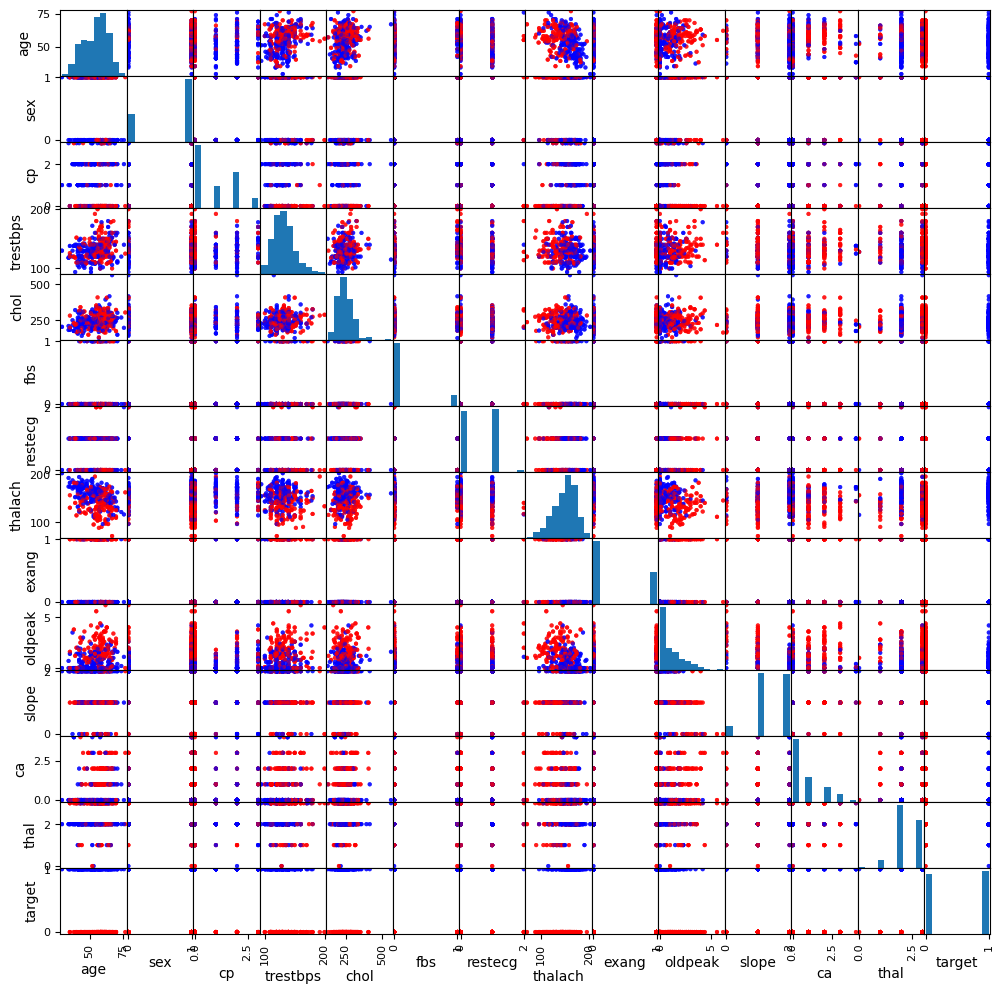

In [6]:
# Получение значений целевой переменной
target = sheet['target']

# Создание цветовой карты на основе значений target
colors = target.map({0: 'red', 1: 'blue'})  # Замените 0 и 1 на ваши значения целевой переменной и соответствующие цвета

# Построение матрицы рассеяния
scatter_matrix(sheet, figsize=(12, 12), c=colors, alpha=0.5, diagonal='hist')

# Показ графика
plt.show()


## Информация про данные

In [4]:
print(sheet.shape)
print(sheet.dtypes)
print(sheet.describe())
print(sheet.info())

(1025, 14)
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      

Проверка на сбалансированность датасета
---

In [5]:
class_distribution = sheet['target'].value_counts()
print(class_distribution)

target
1    526
0    499
Name: count, dtype: int64


Вывод: сбалансировано(отклонение менее 10%). Использование метрики accuracy при обучении нейросетей будет уместно

####Тепловая матрица

<Axes: title={'center': 'Correlation matrix'}>

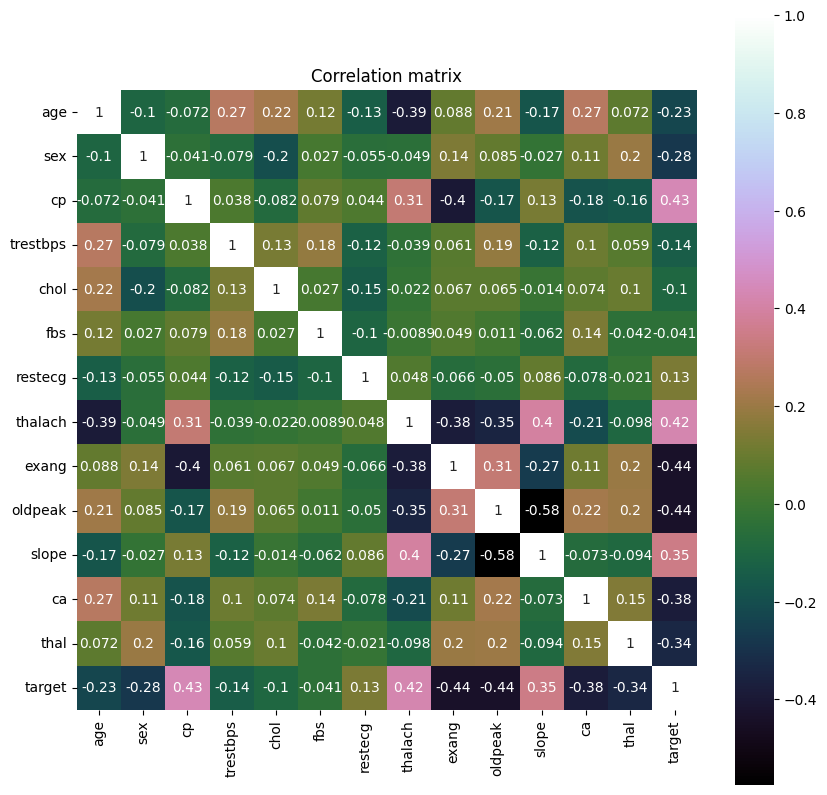

In [11]:
import seaborn as sns

correlation = sheet.corr()
plt.figure(figsize=(10, 10))
plt.title('Correlation matrix')
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap='cubehelix')

По карте "температур" видно что неиформатированными признаками являются: fbs, restecg, chol, trestbps

In [5]:
sheet_clr = sheet.drop(['fbs','restecg', 'chol', 'trestbps'], axis='columns')

In [25]:
print(sheet.dtypes)
print(sheet_clr.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
age          int64
sex          int64
cp           int64
thalach      int64
exang        int64
oldpeak    float64
slope        int64
ca           int64
thal         int64
target       int64
dtype: object


In [6]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler(feature_range=(0,1))
sheet_clr_scl = pd.DataFrame(scaler.fit_transform(sheet_clr)) # преобразованный масштабированный
sheet_clr_scl[sheet_clr_scl.columns[-1]] = sheet_clr_scl[sheet_clr_scl.columns[-1]].astype(np.int32)
sheet_clr_scl.rename(columns={sheet_clr_scl.columns[-1]: 'target'}, inplace=True)
sheet_clr_scl.head()

,0,1,2,3,4,5,6,7,8,target
0,0.479167,1.0,0.0,0.740458,0.0,0.161290,1.0,0.50,1.000000,0
1,0.500000,1.0,0.0,0.641221,1.0,0.500000,0.0,0.00,1.000000,0
2,0.854167,1.0,0.0,0.412214,1.0,0.419355,0.0,0.00,1.000000,0
3,0.666667,1.0,0.0,0.687023,0.0,0.000000,1.0,0.25,1.000000,0
4,0.687500,0.0,0.0,0.267176,0.0,0.306452,0.5,0.75,0.666667,0


## Обучение RNN модели

Модель настроена для обучения с использованием оптимизатора Adam(Adaptive Moment Estimation), который автоматически адаптирует скорость обучения для каждого параметра(средние и квадратичные значения градиентов), обеспечивая эффективное обновление весов. Функция потерь sparse_categorical_crossentropy подходит для отлично классификации, где метки представлены целыми числами, и измеряет степень расхождения между предсказаниями модели и реальными метками. Метрики accuracy и f1_score позволяют отслеживать производительность модели: точность оценивает долю правильных предсказаний, а F1-мера учитывает баланс между точностью и полнотой. Также выбран оптимальный batch_size, который определяет количество образцов из обучающего набора данных, которые используются для обновления весов модели за одну итерацию.

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, classification_report
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.utils import to_categorical

functions_dict = {
    "get_train_test_and_val_data": "Default dataset",
    "get_scl_train_test_and_val_data": "Scaled dataset"
}

# Функция для получения и стандартизации данных
def get_train_test_and_val_data():

    sheet_x = sheet_clr.iloc[:, :-1]
    sheet_y = sheet_clr['target']

    seed = 7
    test_size = 0.2
    val_size = 0.25

    x_train, x_test, y_train, y_test = train_test_split(sheet_x, sheet_y, test_size=test_size, random_state=seed)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_size, random_state=seed)

    return x_train, y_train, x_test, y_test, x_val, y_val

def get_scl_train_test_and_val_data():

    sheet_x = sheet_clr_scl.iloc[:, :-1]
    sheet_y = sheet_clr_scl['target']

    seed = 7
    test_size = 0.2
    val_size = 0.25

    x_train, x_test, y_train, y_test = train_test_split(sheet_x, sheet_y, test_size=test_size, random_state=seed)
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_size, random_state=seed)

    return x_train, y_train, x_test, y_test, x_val, y_val


for data_function in [
        get_train_test_and_val_data,
        get_scl_train_test_and_val_data]:

        x_train, y_train, x_test, y_test, x_val, y_val = data_function()

        # Изменение формы входных данных. RNN ожидает входные данные в форме (samples, timesteps, features)
        x_train_array = x_train.values
        x_val_array = x_val.values
        x_test_array = x_test.values
        x_train = x_train_array.reshape((x_train.shape[0], 1, x_train.shape[1]))
        x_val = x_val_array.reshape((x_val.shape[0], 1, x_val.shape[1]))
        x_test = x_test_array.reshape((x_test.shape[0], 1, x_test.shape[1]))

        # Создание модели
        modelRnn = Sequential()
        modelRnn.add(SimpleRNN(256, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
        modelRnn.add(Dense(128, activation='relu'))
        modelRnn.add(Dense(64, activation='relu'))
        modelRnn.add(Dense(32, activation='relu'))
        modelRnn.add(Dense(2, activation='softmax'))  # Для бинарной классификации

        # Компиляция модели
        modelRnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy', 'f1_score'])

        # Обучение модели
        history = modelRnn.fit(x_train, y_train, epochs=100, batch_size=16, verbose=0, validation_data=(x_val, y_val))

        # Оценка качества на обучающей выборке
        y_train_pred = modelRnn.predict(x_train)
        y_train_pred_classes = np.argmax(y_train_pred, axis=1)

        # Метрики для обучающей выборки
        train_accuracy = accuracy_score(y_train, y_train_pred_classes)
        train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred_classes)
        train_f1 = f1_score(y_train, y_train_pred_classes, average='weighted')
        print(functions_dict[data_function.__name__])
        print("Training Metrics:")
        print("Accuracy:", train_accuracy)
        print("Balanced Accuracy:", train_balanced_accuracy)
        print("F1 Score (weighted):", train_f1)
        print(classification_report(y_train, y_train_pred_classes))

        # Оценка качества на валидационной выборке
        y_val_pred = modelRnn.predict(x_val)
        y_val_pred_classes = np.argmax(y_val_pred, axis=1)

        # Метрики для валидационной выборки
        val_accuracy = accuracy_score(y_val, y_val_pred_classes)
        val_balanced_accuracy = balanced_accuracy_score(y_val, y_val_pred_classes)
        val_f1 = f1_score(y_val, y_val_pred_classes, average='weighted')

        print("\nValidation Metrics:")
        print("Accuracy:", val_accuracy)
        print("Balanced Accuracy:", val_balanced_accuracy)
        print("F1 Score (weighted):", val_f1)
        print(classification_report(y_val, y_val_pred_classes, zero_division=1))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Default dataset
Training Metrics:
Accuracy: 0.9073170731707317
Balanced Accuracy: 0.9071754950076155
F1 Score (weighted): 0.9072930461071222
              precision    recall  f1-score   support

           0       0.90      0.92      0.91       311
           1       0.92      0.89      0.91       304

    accuracy                           0.91       615
   macro avg       0.91      0.91      0.91       615
weighted avg       0.91      0.91      0.91       615

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Validation Metrics:
Accuracy: 0.8341463414634146
Balanced Accuracy: 0.8329521631408424
F1 Score (weighted): 0.8338372678451555
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        99
           1       0.82      0.87      0.84       106

    accuracy                           0.83       205
   macro avg       0.84      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Scaled dataset
Training Metrics:
Accuracy: 0.9512195121951219
Balanced Accuracy: 0.9514723303435437
F1 Score (weighted): 0.9512068712877009
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       311
           1       0.93      0.97      0.95       304

    accuracy                           0.95       615
   macro avg       0.95      0.95      0.95       615
weighted avg       0.95      0.95      0.95       615

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Validation Metrics:
Accuracy: 0.8829268292682927
Balanced Accuracy: 0.8821231179721746
F1 Score (weighted): 0.8828039002039504
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        99
           1       0.87      0.91      0.89       106

    accuracy                           0.88       205
   macro avg       0.88      0.88      0.88       205
weighted avg       0.88      0.88      0.88       205



## Полносвязная сеть

In [57]:

for data_function in [
        get_train_test_and_val_data,
        get_scl_train_test_and_val_data]:

        x_train, y_train, x_test, y_test, x_val, y_val = data_function()


        # Создание модели
        modelFcnn = Sequential()
        modelFcnn.add(Dense(256, activation='relu'))
        modelFcnn.add(Dense(128, activation='relu'))
        modelFcnn.add(Dense(64, activation='relu'))
        modelFcnn.add(Dense(32, activation='relu'))
        modelFcnn.add(Dense(2, activation='softmax'))

        # Компиляция модели
        modelFcnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy', 'f1_score'])

        # Обучение модели
        history = modelFcnn.fit(x_train, y_train, epochs=100, batch_size=32, verbose=0, validation_data=(x_val, y_val))

        # Оценка качества на обучающей выборке
        y_train_pred = modelFcnn.predict(x_train)
        y_train_pred_classes = np.argmax(y_train_pred, axis=1)

        # Метрики для обучающей выборки
        train_accuracy = accuracy_score(y_train, y_train_pred_classes)
        train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred_classes)
        train_f1 = f1_score(y_train, y_train_pred_classes, average='weighted')
        print(functions_dict[data_function.__name__])
        print("Training Metrics:")
        print("Accuracy:", train_accuracy)
        print("Balanced Accuracy:", train_balanced_accuracy)
        print("F1 Score (weighted):", train_f1)
        print(classification_report(y_train, y_train_pred_classes))

        # Оценка качества на валидационной выборке
        y_val_pred = modelFcnn.predict(x_val)
        y_val_pred_classes = np.argmax(y_val_pred, axis=1)

        # Метрики для валидационной выборки
        val_accuracy = accuracy_score(y_val, y_val_pred_classes)
        val_balanced_accuracy = balanced_accuracy_score(y_val, y_val_pred_classes)
        val_f1 = f1_score(y_val, y_val_pred_classes, average='weighted')

        print("\nValidation Metrics:")
        print("Accuracy:", val_accuracy)
        print("Balanced Accuracy:", val_balanced_accuracy)
        print("F1 Score (weighted):", val_f1)
        print(classification_report(y_val, y_val_pred_classes, zero_division=1))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Default dataset
Training Metrics:
Accuracy: 0.8829268292682927
Balanced Accuracy: 0.883133778981215
F1 Score (weighted): 0.8829082560524177
              precision    recall  f1-score   support

           0       0.90      0.86      0.88       311
           1       0.87      0.90      0.88       304

    accuracy                           0.88       615
   macro avg       0.88      0.88      0.88       615
weighted avg       0.88      0.88      0.88       615

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

Validation Metrics:
Accuracy: 0.7951219512195122
Balanced Accuracy: 0.7918810748999429
F1 Score (weighted): 0.7928950159066808
              precision    recall  f1-score   support

           0       0.85      0.70      0.77        99
           1       0.76      0.89      0.82       106

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

2

## Анализ лучшей модели

Лучший результат у Полносвязной модели на масшабированных данных

####Training Metrics:<br>
Accuracy: 0.9983739837398374<br>
Balanced Accuracy: 0.9983922829581994<br>
F1 Score (weighted): 0.998374009536721<br>
####Validation Metrics:<br>
Accuracy: 0.9560975609756097<br>
Balanced Accuracy: 0.956546598056032<br>
F1 Score (weighted): 0.9561101018422882<br>

## Определение лучших гиперпараметров

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from scikeras.wrappers import KerasClassifier



x_train, y_train, x_test, y_test, x_val, y_val = get_scl_train_test_and_val_data()

def create_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(256, activation=activation, input_shape=(x_train.shape[1],)))
    model.add(Dense(128, activation=activation))
    model.add(Dense(64, activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(2, activation='softmax')) # 2 класса для бинарной классификации
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, verbose=1)

param_grid = {
    'batch_size': [8 ,16, 32, ],
    'epochs': [50, 100, 150],
    'optimizer': ['adam', 'sgd'],
    'model__activation': ['relu', 'tanh'],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=3, verbose=1)
grid_result = grid.fit(x_train, y_train)

print("Лучшие параметры: ", grid_result.best_params_)
print("Лучший балл: ", grid_result.best_score_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


KeyboardInterrupt: 

Лучшие параметры:  {'batch_size': 16, 'epochs': 400, 'neurons': 10, 'optimizer': 'adam'}
Лучший балл:  0.9907407407407408

## Показатели качества полученной в результате Grid поиска классификационной нейросетевой модели

In [16]:

x_train, y_train, x_test, y_test, x_val, y_val = get_scl_train_test_and_val_data()


 # Создание модели
modelFcnn = Sequential()
modelFcnn.add(Dense(256, activation='tanh'))
modelFcnn.add(Dense(128, activation='tanh'))
modelFcnn.add(Dense(64, activation='tanh'))
modelFcnn.add(Dense(32, activation='tanh'))
modelFcnn.add(Dense(2, activation='softmax'))
# Компиляция модели
modelFcnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy', 'f1_score'])
# Обучение модели
history = modelFcnn.fit(x_train, y_train, epochs=150, batch_size=32, verbose=1, validation_data=(x_val, y_val))
# Оценка качества на обучающей выборке
y_train_pred = modelFcnn.predict(x_train)
y_train_pred_classes = np.argmax(y_train_pred, axis=1)
# Метрики для обучающей выборки
train_accuracy = accuracy_score(y_train, y_train_pred_classes)
train_balanced_accuracy = balanced_accuracy_score(y_train, y_train_pred_classes)
train_f1 = f1_score(y_train, y_train_pred_classes, average='weighted')
print(functions_dict[data_function.__name__])
print("Training Metrics:")
print("Accuracy:", train_accuracy)
print("Balanced Accuracy:", train_balanced_accuracy)
print("F1 Score (weighted):", train_f1)
print(classification_report(y_train, y_train_pred_classes))
# Оценка качества на валидационной выборке
y_val_pred = modelFcnn.predict(x_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
# Метрики для валидационной выборки
val_accuracy = accuracy_score(y_val, y_val_pred_classes)
val_balanced_accuracy = balanced_accuracy_score(y_val, y_val_pred_classes)
val_f1 = f1_score(y_val, y_val_pred_classes, average='weighted')
print("\nValidation Metrics:")
print("Accuracy:", val_accuracy)
print("Balanced Accuracy:", val_balanced_accuracy)
print("F1 Score (weighted):", val_f1)
print(classification_report(y_val, y_val_pred_classes, zero_division=1))

Epoch 1/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7088 - f1_score: 0.4969 - loss: 0.5336 - val_accuracy: 0.7756 - val_f1_score: 0.4462 - val_loss: 0.5217
Epoch 2/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8470 - f1_score: 0.4956 - loss: 0.3693 - val_accuracy: 0.7902 - val_f1_score: 0.4675 - val_loss: 0.4568
Epoch 3/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8382 - f1_score: 0.4985 - loss: 0.3731 - val_accuracy: 0.8098 - val_f1_score: 0.5213 - val_loss: 0.4641
Epoch 4/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8394 - f1_score: 0.5001 - loss: 0.3592 - val_accuracy: 0.7951 - val_f1_score: 0.4973 - val_loss: 0.4447
Epoch 5/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8301 - f1_score: 0.4882 - loss: 0.3569 - val_accuracy: 0.8000 - val_f1_score: 0.4923 - val_loss: 0.4483
Epoch 6/150
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8355 - f1_score: 0.4989 - loss: 0.3176 - val_accuracy: 0.7951 - val_f1_score: 0.5034 - va